# Monopoly using Monte Carlo Simulation & Markov Chains

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as la
from random import sample


In [2]:
dice = [2,3,4,5,6,7,3,4,5,6,7,8,4,5,6,7,8,9,5,6,7,8,9,10,6,7,8,9,10,11,7,8,9,10,11,12]
counts = pd.value_counts(dice)
counts = pd.DataFrame(counts)
counts

,count
7,6
6,5
8,5
5,4
9,4
4,3
10,3
3,2
11,2
2,1


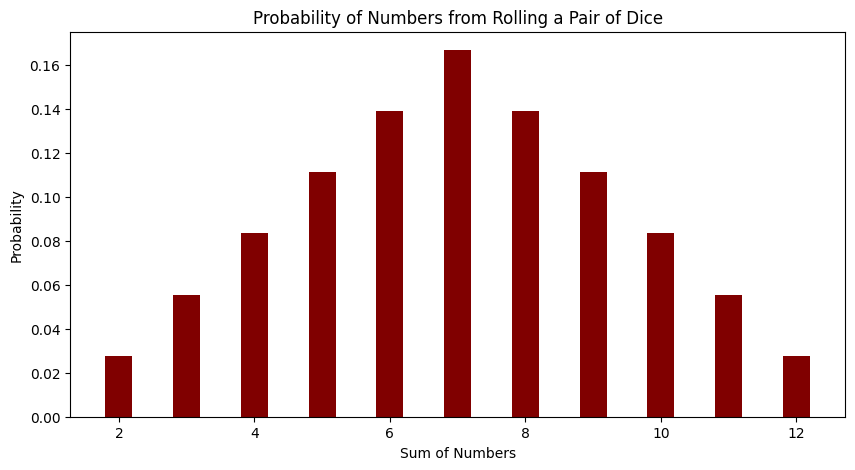

In [3]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(counts.index, counts['count']/36, color ='maroon',
        width = 0.4)
 
plt.xlabel("Sum of Numbers")
plt.ylabel("Probability")
plt.title("Probability of Numbers from Rolling a Pair of Dice")
plt.show()

In [4]:
import numpy as np

def create_monopoly_transition_matrix():
    
    # Define total number of states
    num_states = 40  
    
    # Create an empty 40x40 transition matrix
    transition_matrix = np.zeros((num_states, num_states))
    
    # Define the transition probabilities for each state
    for state in range(num_states):
        if state == 10:  # Jail
            transition_matrix[state, 10] = 1.0
        elif state == 30:  # Go to jail
            transition_matrix[state, 10] = 1.0
            
        else:
            roll_dice_prob = 1 / 36 
            
            # Transition probabilities for rolling doubles
            for i in range(1, 7):
                for j in range(1, 7):
                    next_state = (state + i + j) % num_states
                    transition_matrix[state, next_state] += roll_dice_prob
                                    
    return transition_matrix


In [5]:
array = create_monopoly_transition_matrix()

In [6]:
transition_matrix = pd.DataFrame(array)
transition_matrix

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000000,0.000000,0.027778,0.055556,0.083333,0.111111,0.138889,0.166667,0.138889,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.027778,0.055556,0.083333,0.111111,0.138889,0.166667,0.138889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.027778,0.055556,0.083333,0.111111,0.138889,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.055556,0.083333,0.111111,0.138889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.055556,0.083333,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.055556,0.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.055556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
import random

positions = list(range(40))
visits = [0] * 40

board = [
    "GO", "Mediterranean Avenue", "Community Chest # 1", "Baltic Avenue", "Income Tax",
    "Reading Railroad", "Oriental Avenue", "Chance # 1", "Vermont Avenue", "Connecticut Avenue",
    "Jail", "St. Charles Place", "Electric Company", "States Avenue", "Virginia Avenue",
    "Pennsylvania Railroad", "St. James Place", "Community Chest # 2", "Tennessee Avenue", "New York Avenue",
    "Free Parking", "Kentucky Avenue", "Chance # 2", "Indiana Avenue", "Illinois Avenue",
    "B. & O. Railroad", "Atlantic Avenue", "Ventnor Avenue", "Water Works", "Marvin Gardens",
    "Go To Jail", "Pacific Avenue", "North Carolina Avenue", "Community Chest # 3", "Pennsylvania Avenue",
    "Short Line", "Chance # 3", "Park Place", "Luxury Tax", "Boardwalk"
]

community_chest_cards = [
    "Advance to GO", "Bank error in your favor", "Doctor's fees", "Get out of Jail free",
    "Go to Jail", "Grand Opera Night", "Holiday Fund matures", "Income Tax refund",
    "It's your birthday", "Life insurance matures", "Pay hospital fees", "Pay school fees",
    "Receive $25 consultancy fee", "You are assessed for street repairs", "You have won second prize in a beauty contest",
    "You inherit $100", "From sale of stock you get $50", "Holiday Fund matures"
]

chance_cards = [
    "Advance to GO", "Advance to Illinois Avenue", "Advance to St. Charles Place",
    "Advance to nearest Utility", "Advance to nearest Railroad", "Bank pays you dividend",
    "Get out of Jail free", "Go back 3 spaces", "Go to Jail", "Make general repairs on all your properties",
    "Pay poor tax", "Take a trip to Reading Railroad", "Take a walk on the Boardwalk",
    "You have been elected Chairman of the Board", "Your building and loan matures",
    "You have won a crossword competition"
]

# Run MC simulation
current_position = 0

num_iterations = 100000

for _ in range(num_iterations):
    visits[current_position] += 1

    # Roll the dice
    dice_roll = random.randint(1, 6) + random.randint(1, 6)

    # Move the player
    current_position = (current_position + dice_roll) % 40

    if current_position == 30:  # Go To Jail
        current_position = 10
    elif current_position == 2 or current_position == 17 or current_position == 33:  # Community Chest
        # Draw a Community Chest card
        community_chest_card = random.choice(community_chest_cards)

        if community_chest_card == "Advance to GO":
            current_position = 0
        elif community_chest_card == "Go to Jail":
            current_position = 10
         

    elif current_position == 7 or current_position == 22 or current_position == 36:  # Chance
        # Draw a Chance card
        chance_card = random.choice(chance_cards)

        if chance_card == "Advance to GO":
            current_position = 0
        elif chance_card == "Advance to Illinois Avenue":
            current_position = 24
        elif chance_card == "Advance to St. Charles Place":
            current_position = 11
        elif chance_card == "Advance to nearest Utility":
            if current_position < 13:
                current_position = 13
            elif current_position > 29:
                current_position = 13
            elif current_position < 29:
                current_position = 29
        elif chance_card == "Advance to nearest Railroad":
            if current_position < 5:
                current_position = 5
            elif current_position > 35:
                current_position = 5
            elif current_position < 15:
                current_position = 15
            elif current_position < 25:
                current_position = 25
            elif current_position < 35:
                current_position = 35
        elif chance_card == "Go back 3 spaces":
            current_position = current_position - 3
        elif chance_card == "Go to Jail":
            current_position = 10
        elif chance_card == "Take a trip to Reading Railroad":
            current_position = 5
        elif chance_card == "Take a walk on the Boardwalk":
            current_position = 39

# Calculate visit probabilities
visit_probabilities = [visit_count / num_iterations for visit_count in visits]

# Determine best strategy based on visit probabilities
ind = np.argpartition(visit_probabilities, -39)[-39:]
visit_probabilities = np.array(visit_probabilities)
highest_probability = visit_probabilities[ind]
board = np.array(board)
print("Best Strategy:")
print("Focus on the following positions:")
df = pd.DataFrame([board[ind] , visit_probabilities[ind]]).transpose()
df = df.sort_values(by = [1],ascending = False)
df.columns =['Place', 'Probability']
df = df.set_index('Place')
df



Best Strategy:
Focus on the following positions:


,Probability
Place,
Jail,0.05743
Illinois Avenue,0.0313
GO,0.03114
B. & O. Railroad,0.0304
New York Avenue,0.0301
Tennessee Avenue,0.02948
Reading Railroad,0.02863
Free Parking,0.02825
St. James Place,0.02812


In [8]:
print('Mean = ',np.mean(df.Probability))
print('Median = ', np.median(df.Probability))
print('Standard Deviation = ',np.std(df.Probability))
print('Quartiles = ',np.quantile(df.Probability, [0.25,0.5,0.75,0.85]))

Mean =  0.025641025641025637
Median =  0.02628
Standard Deviation =  0.007093502189118916
Quartiles =  [0.023469999999999998 0.02628 0.02769 0.028884999999999997]


In [9]:
quartiles = np.quantile(df.Probability, [0.25,0.5,0.75,0.85])
cutoff = quartiles[-1]
cutoff

0.028884999999999997

In [10]:
df_best = df[df > cutoff]
df_best = df_best.dropna()
df_best

,Probability
Place,
Jail,0.05743
Illinois Avenue,0.0313
GO,0.03114
B. & O. Railroad,0.0304
New York Avenue,0.0301
Tennessee Avenue,0.02948


In [11]:
df_best = df_best.drop(["Jail","GO"],axis = 0)
df_best

,Probability
Place,
Illinois Avenue,0.0313
B. & O. Railroad,0.0304
New York Avenue,0.0301
Tennessee Avenue,0.02948


In [12]:
df

,Probability
Place,
Jail,0.05743
Illinois Avenue,0.0313
GO,0.03114
B. & O. Railroad,0.0304
New York Avenue,0.0301
Tennessee Avenue,0.02948
Reading Railroad,0.02863
Free Parking,0.02825
St. James Place,0.02812


In [24]:
red_prob = df['Probability']['Illinois Avenue'] + df['Probability']['Kentucky Avenue'] + df['Probability']['Indiana Avenue']
yellow_prob = df['Probability']['Marvin Gardens'] + df['Probability']['Ventnor Avenue'] + df['Probability']['Atlantic Avenue']
green_prob = df['Probability']['Pennsylvania Avenue'] + df['Probability']['Pacific Avenue'] + df['Probability']['North Carolina Avenue']
blue_prob = df['Probability']['Park Place'] + df['Probability']['Boardwalk']
brown_prob = df['Probability']['Mediterranean Avenue'] + df['Probability']['Baltic Avenue']
cyan_prob = df['Probability']['Oriental Avenue'] + df['Probability']['Vermont Avenue'] + df['Probability']['Connecticut Avenue']
pink_prob = df['Probability']['States Avenue'] + df['Probability']['St. Charles Place'] + df['Probability']['Virginia Avenue']
orange_prob = df['Probability']['Tennessee Avenue'] + df['Probability']['St. James Place'] + df['Probability']['New York Avenue']




In [25]:
tiles = ['Red','Yellow','Green','Blue','Brown','Cyan','Pink','Orange']
probs_tiles = [red_prob,yellow_prob,green_prob,blue_prob,brown_prob,cyan_prob,pink_prob,orange_prob]

In [27]:
df_tiles = {'Tile':tiles,'Probability':probs_tiles}
df_tiles

{'Tile': ['Red', 'Yellow', 'Green', 'Blue', 'Brown', 'Cyan', 'Pink', 'Orange'],
 'Probability': [0.08624,
  0.08101,
  0.07849,
  0.04871,
  0.043289999999999995,
  0.06977,
  0.0792,
  0.0877]}

In [28]:
df_tiles = pd.DataFrame(df_tiles)
df_tiles

,Tile,Probability
0,Red,0.08624
1,Yellow,0.08101
2,Green,0.07849
3,Blue,0.04871
4,Brown,0.04329
5,Cyan,0.06977
6,Pink,0.07920
7,Orange,0.08770
